In [1]:
db_path = "benchmark.db"
measure = "cpu_time"

In [2]:
# Parameters
db_path = "/Users/rkkautsar/college/thesis/benchmark-demo-sat/output/benchmark.db"
measure = "wall_time"
output = "statistics/cactus.ipynb"


In [3]:
from reprobench.utils import init_db
init_db(db_path)

In [14]:
import itertools

import pandas as pd
import seaborn as sns

from reprobench.core.db import Run, Tool, ParameterGroup
from reprobench.executors.db import RunStatistic


def cactus_plot(measure, **kwargs):
    cactus_df = pd.DataFrame()
    
    for group in ParameterGroup.select():
        tool_name = f"{group.tool_id}_{group.name}"
        measure_field = getattr(RunStatistic, measure)
        values_query = (
            RunStatistic
            .select(measure_field)
            .join(Run)
            .where(RunStatistic.verdict == RunStatistic.RUNTIME_ERR)
            .where(Run.tool_id == group.tool_id)
            .where(Run.parameter_group_id == group.id)
            .order_by(measure_field)
#             .order_by(fn.Random()).limit(100)
        )
        data = [*itertools.chain.from_iterable(values_query.tuples())]
        series = pd.Series(
            data=data,
            name=tool_name[6:],
        ).sample(min(len(data), 50)).sort_values().reset_index(drop=True)
#         display(series.reset_index(drop=True))
        
        cactus_df = cactus_df.append(series, sort=False)
    
    cactus_df = cactus_df.transpose().reset_index(drop=True)
    
    return sns.lineplot(data=cactus_df, markers=True, dashes=True, **kwargs)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


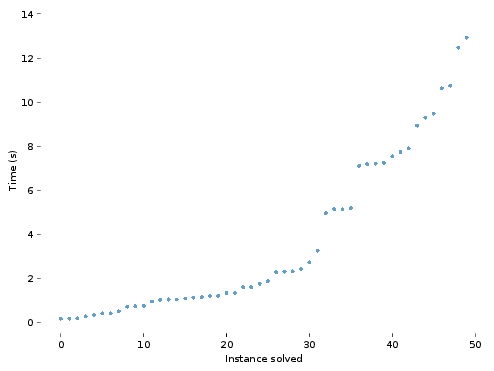

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks()
plt.xlabel("Instance solved")
plt.ylabel("Time (s)")
cactus_plot(measure, ax=ax, linewidth=0, alpha=0.7)

# plt.show()
plt.savefig("cactus.pgf")